In [ ]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
df = pd.read_csv(path + "/IMDB Dataset.csv")
print(f"Dataset shape: {df.shape}")
print(df.head())

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Dataset shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-english')

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

df['processed_review'] = df['cleaned_review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading omw-english: Package 'omw-english' not found
[nltk_data]     in index


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8854
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8489
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



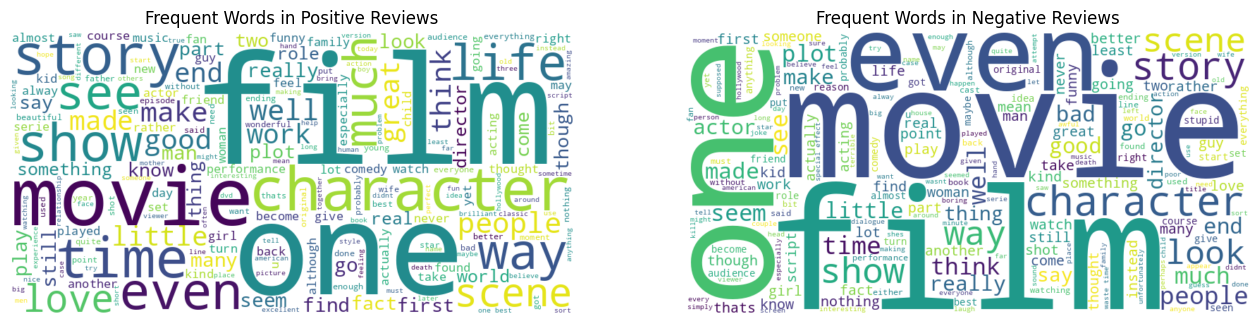

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

positive_reviews = ' '.join(df[df['sentiment'] == 1]['processed_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 0]['processed_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Frequent Words in Positive Reviews')
axes[0].axis('off')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Frequent Words in Negative Reviews')
axes[1].axis('off')
plt.show()

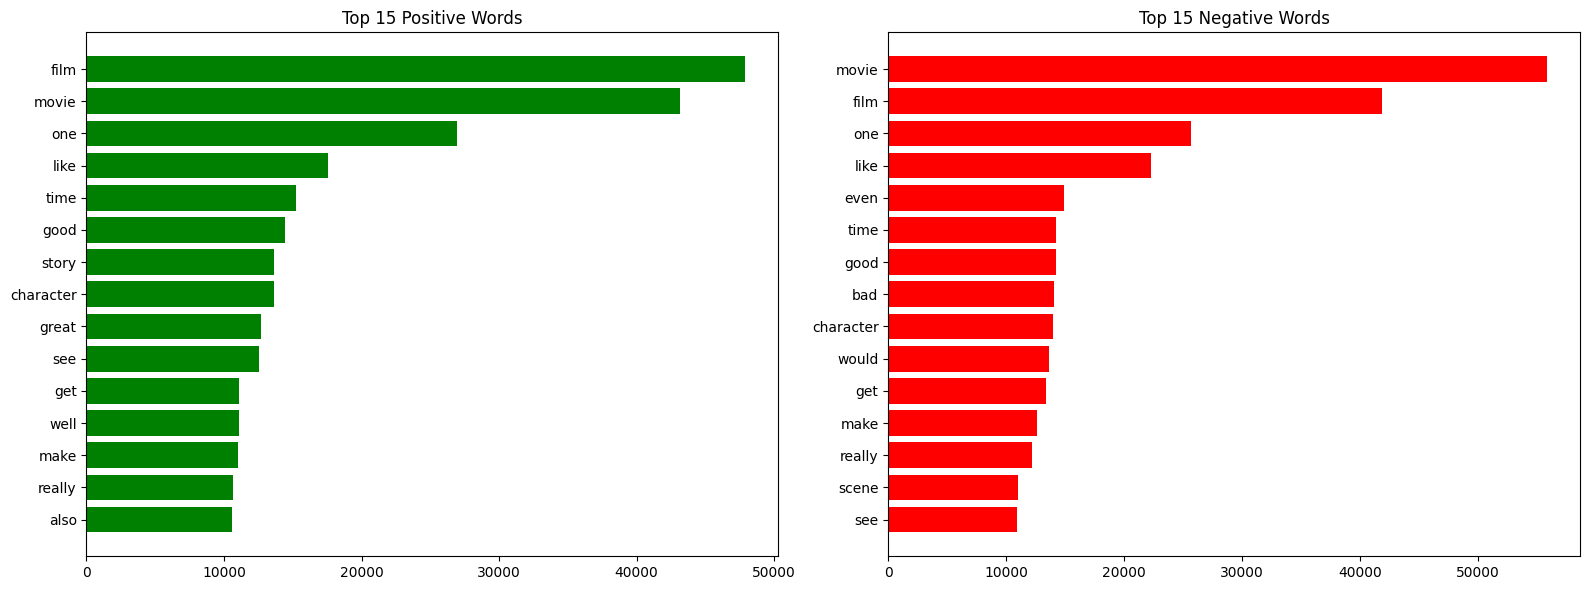


✅ Task 1 - Sentiment Analysis Completed!


In [ ]:
import seaborn as sns

positive_words = positive_reviews.split()
negative_words = negative_reviews.split()

positive_freq = Counter(positive_words).most_common(15)
negative_freq = Counter(negative_words).most_common(15)

pos_words, pos_counts = zip(*positive_freq)
neg_words, neg_counts = zip(*negative_freq)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].barh(pos_words, pos_counts, color='green')
axes[0].set_title('Top 15 Positive Words')
axes[0].invert_yaxis()

axes[1].barh(neg_words, neg_counts, color='red')
axes[1].set_title('Top 15 Negative Words')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ Task 1 - Sentiment Analysis Completed!")